In [1]:
from dataclasses import dataclass
from typing import List, Optional

@dataclass
class PAFRecord:
    query_name: str
    query_length: int
    query_start: int
    query_end: int
    strand: str
    target_name: str
    target_length: int
    target_start: int
    target_end: int
    matching_bases: int
    bases_including_gaps: int
    mapping_quality: int
    optional_fields: Optional[List[str]] = None


In [2]:
def parse_paf_line(line: str) -> PAFRecord:
    fields = line.strip().split('\t')
    
    if len(fields) < 12:
        raise ValueError(f"Line has fewer than 12 fields: {line}")
    
    # Parse mandatory fields
    record = PAFRecord(
        query_name=fields[0],
        query_length=int(fields[1]),
        query_start=int(fields[2]),
        query_end=int(fields[3]),
        strand=fields[4],
        target_name=fields[5],
        target_length=int(fields[6]),
        target_start=int(fields[7]),
        target_end=int(fields[8]),
        matching_bases=int(fields[9]),
        bases_including_gaps=int(fields[10]),
        mapping_quality=int(fields[11]),
        optional_fields=fields[12:] if len(fields) > 12 else None
    )
    
    return record


In [3]:
def parse_paf_file(file_path: str) -> List[PAFRecord]:
    records = []
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#') or not line.strip():
                continue  # Skip comments and empty lines
            try:
                record = parse_paf_line(line)
                records.append(record)
            except ValueError as e:
                print(f"Skipping line due to error: {e}")
    return records


In [52]:
import os

file_path = r'/Users/disha/Desktop/Undergrad project/minimap_analysis/'

In [12]:
file_paths = [os.path.join(file_path,file_name) for file_name in os.listdir(file_path) if "h_" in file_name and ".paf" in  file_name]

In [19]:
record_dictionary = {file_path.split("/")[-1].split(".paf")[0]: parse_paf_file(file_path) for file_path in file_paths}

In [42]:
div_dictionary = {}

for key, value in record_dictionary.items():
    div_lists = []
    for seq in value: 
        div = seq.optional_fields[8].split(":")[-1]
        div_lists.append(float(div))
    div_dictionary[key] = div_lists

In [64]:
stat_dictionary = []

for key,value in div_dictionary.items():
    stats = pd.Series(value).describe()
    stat_dictionary.append(stats)
    
df_stats = pd.concat(stat_dictionary, axis = 1)
df_stats.columns = list(div_dictionary.keys())
df_stats 

,p_napi_brassicae,p_brassicar_rapae,p_napi_rapae
count,36877.000000,30161.000000,32798.000000
mean,0.083316,0.080914,0.077682
std,0.031795,0.033004,0.033324
min,0.000000,0.000000,0.000000
25%,0.058700,0.054200,0.050700
50%,0.085700,0.082000,0.077700
75%,0.107600,0.106400,0.103600
max,0.210200,0.189000,0.202100


In [67]:
df_p

,p_napi_brassicae,p_brassicar_rapae,p_napi_rapae
count,36877.000000,30161.000000,32798.000000
mean,0.083316,0.080914,0.077682
std,0.031795,0.033004,0.033324
min,0.000000,0.000000,0.000000
25%,0.058700,0.054200,0.050700
50%,0.085700,0.082000,0.077700
75%,0.107600,0.106400,0.103600
max,0.210200,0.189000,0.202100


In [68]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [45]:
s = pd.Series(div_dictionary["p_napi_brassicae"])

In [ ]:
plt.plot(range(len(de_values)), de_values, 'o', markersize=2, alpha=0.5)


In [50]:
s.describe()

count    36877.000000
mean         0.083316
std          0.031795
min          0.000000
25%          0.058700
50%          0.085700
75%          0.107600
max          0.210200
dtype: float64

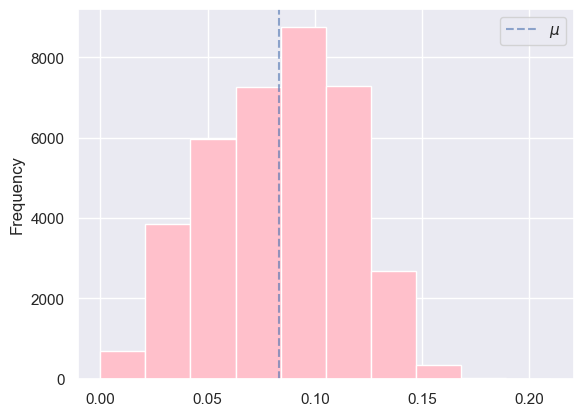

In [81]:
s.hist(color="pink")
plt.ylabel("Frequency")
plt.axvline(0.083316, linestyle="dashed", alpha=0.6, label = "$\mu$")
plt.legend();

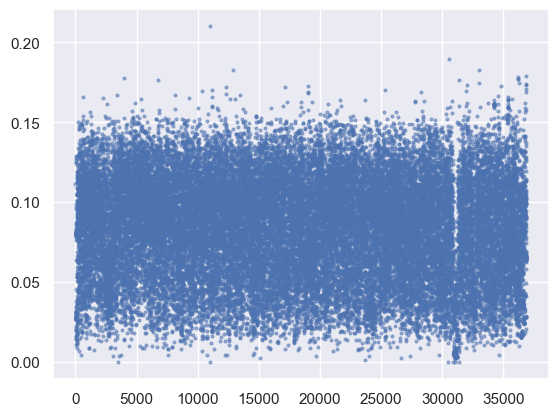

In [72]:
de_values = div_dictionary["p_napi_brassicae"]

plt.plot(range(len(de_values)), de_values, 'o', markersize=2, alpha=0.5)


In [55]:
record_dictionary["p_napi_brassicae"][0].optional_fields


['NM:i:117',
 'ms:i:319',
 'AS:i:281',
 'nn:i:0',
 'tp:A:P',
 'cm:i:13',
 's1:i:154',
 's2:i:154',
 'de:f:0.1115',
 'rl:i:283386',
 'cg:Z:306M14D148M2I29M3D69M1D179M1I18M11D6M1D54M',
 'cs:Z::11*at:8*ga:5*tc:2*tc:14*tc:2*ta:3*tg:13*ag:4*tc*ct:15*ta:1*ac:2*ag:4*ct*ca:3*gc:2*ga:17*ga:1*ta:2*tc:2*ta:1*ga:3*tc:6*tc:4*ac:21*cg:15*ac:9*tg:32*at:4*ag:8*ag:3*ct:2*ct:1*ag:33*at:7*ac:10-tttaaaaccaaact:1*ta:1*ta:32*ct:6*tc:16*ag:5*ct:4*ac:11*ag*at:16*tc:13*ct:1*ct*ga:18*tc:3*ct:6+aa:4*ga*tg:17*ct:5-ttg:12*tc:3*ta:10*ta:15*gt:13*tc:11-a:20*ct:2*ta*ca:4*ct:1*gc:3*gc:9*ga:24*ag:15*ga:2*at:2*ga:11*gt*tc:6*ga:18*ac:3*ac:1*cg:9*ta:9*ct:6*ct:1*tc:6*ct:5+a:18-gcatttgtcgc:6-a:1*at:40*ta:2*at:8']